<a href="https://colab.research.google.com/github/thatipartiashritha/NLP_2024/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load data fromkeras.datasets and perform following computational analysis.
a. Preprocessing of the Data <br>
b. Divide data into training and testing data set <br>
c. Build the Recurrent Neural network (RNN) Model <br>
d. Training the RNN Model <br>
e. Evaluate the model on the test dataset to see how well it generalizes.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import imdb

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    keras.layers.SimpleRNN(32),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.6134 - loss: 0.6220 - val_accuracy: 0.8070 - val_loss: 0.4247
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8651 - loss: 0.3265 - val_accuracy: 0.8100 - val_loss: 0.4139
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9100 - loss: 0.2345 - val_accuracy: 0.8227 - val_loss: 0.4298
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.9435 - loss: 0.1603 - val_accuracy: 0.8150 - val_loss: 0.5062
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9682 - loss: 0.0952 - val_accuracy: 0.8164 - val_loss: 0.5789


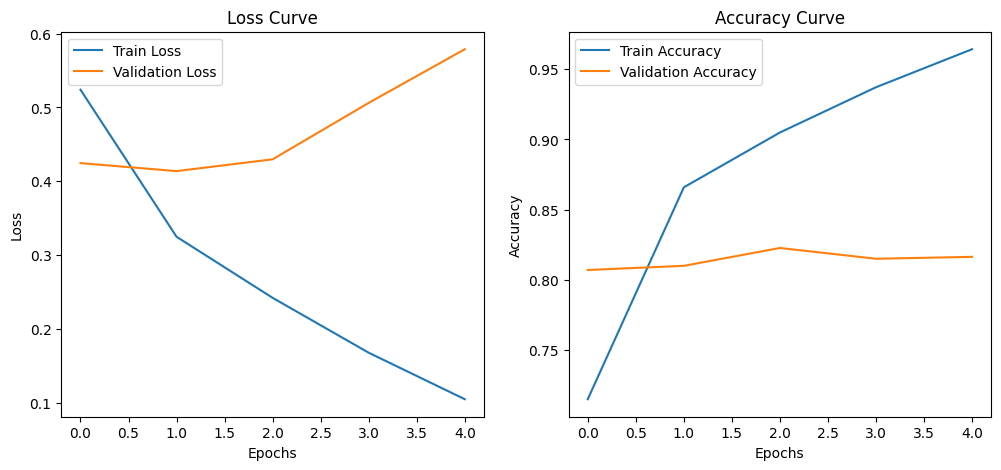

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8145 - loss: 0.5908
Test accuracy: 0.8163599967956543


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# 2. Develop LSTM (Long Short-Term Memory) by utilizing data set
* from https://www.kaggle.com/code/amirrezaeiantime-series-data-analysis-using-lstm-tutorial Links to an external site. or take any time series data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


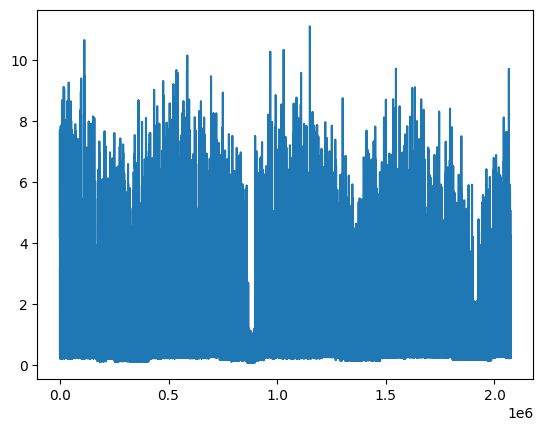

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';', parse_dates={'dt': ['Date', 'Time']},
                 dayfirst=True, low_memory=False, na_values=['nan','?'], index_col='dt')

df.fillna(df.mean(), inplace=True)

data = df['Global_active_power'].values.astype(float)

plt.plot(data)
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Input # Import the Input layer

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

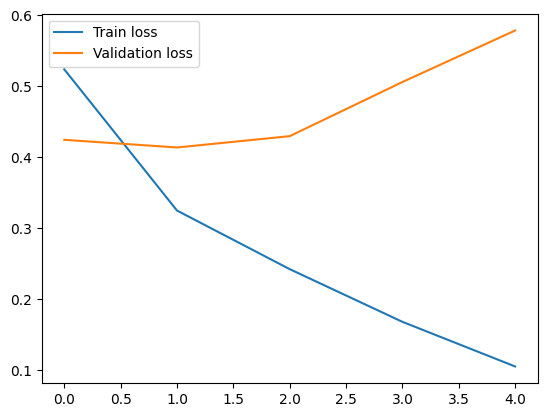

12970/12970 ━━━━━━━━━━━━━━━━━━━━ 112s 9ms/step


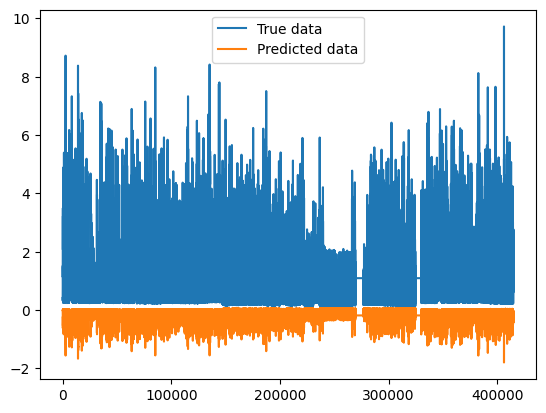

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

plt.plot(data[-len(predicted):], label='True data')
plt.plot(predicted, label='Predicted data')
plt.legend()
plt.show()

# 3. Demonstrate Vanishing and Exploding Gradients on deep neural network.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def generate_data(n_samples=1000, n_features=20):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(0, 2, size=(n_samples, 1))
    return X, y

def create_deep_network(activation='sigmoid'):
    model = Sequential()
    model.add(Dense(64, input_dim=20, activation=activation))
    for _ in range(10):
        model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

class GradientMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        grads = []
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                grads.append(tf.reduce_mean(tf.abs(layer.kernel)))
        if grads:
            grad_mean = np.mean([g.numpy() for g in grads])
            print(f"Epoch {epoch+1}: Gradient Mean: {grad_mean:.4f}")

X, y = generate_data()

model = create_deep_network()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Training the model...")
model.fit(X, y, epochs=5, batch_size=32, callbacks=[GradientMonitorCallback()])

loss, accuracy = model.evaluate(X, y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/5
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5635 - loss: 0.8084Epoch 1: Gradient Mean: 0.1139
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5514 - loss: 0.7977
Epoch 2/5
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5573 - loss: 0.6878 Epoch 2: Gradient Mean: 0.1139
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5471 - loss: 0.6898
Epoch 3/5
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5415 - loss: 0.6901 Epoch 3: Gradient Mean: 0.1139
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5388 - loss: 0.6904
Epoch 4/5
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5255 - loss: 0.6928 Epoch 4: Gradient Mean: 0.1139
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5258 - loss: 0.6927
Epoch 5/5
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 0.6914 Epoch 5: Gradient Mean: 0.1139
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5305 - loss: 0.6918
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc